In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

# Fetch financial data using YFinance
assets = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

data = yf.download(assets, start=start_date, end=end_date)

# Show the first few rows of the data
print(data.head())


[*********************100%***********************]  3 of 3 completed

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358765  173.173737  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542728  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726742  168.444641  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765038  170.543686  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665417  173.569962  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

In [8]:
# Step 2: Data Cleaning and Understanding
# Check for missing values
print("Missing values in data:")
print(data.isnull().sum())

# Fill missing values using forward fill and backward fill where necessary
data_clean = data.fillna(method='ffill').fillna(method='bfill')

# Check the data types to ensure they are appropriate
print("\nData types after cleaning:")
print(data_clean.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(data_clean.describe())


Missing values in data:
Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64

Data types after cleaning:
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY       

/tmp/ipykernel_18427/369622565.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data.fillna(method='ffill').fillna(method='bfill')


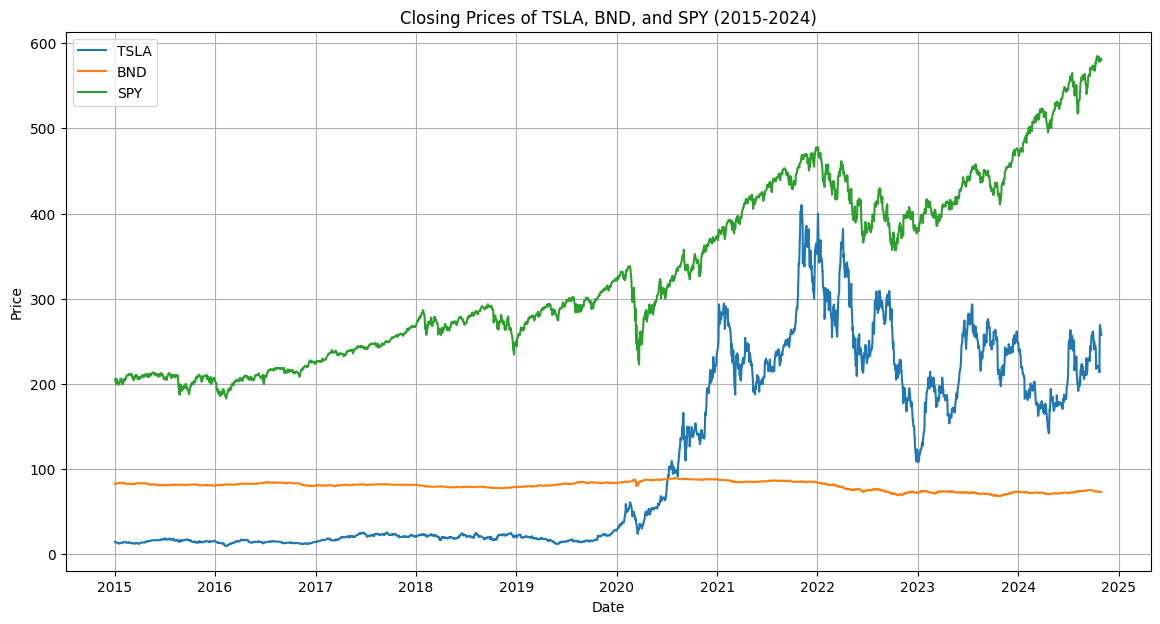

In [ ]:
# Visualize the closing price over time for each asset
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(data_clean['Close'][asset], label=asset)
plt.title('Closing Prices of TSLA, BND, and SPY (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
